Dropout ratio: 0.100


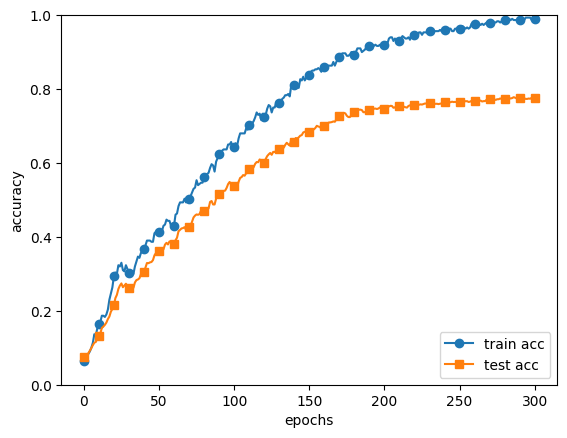

Dropout ratio: 0.110


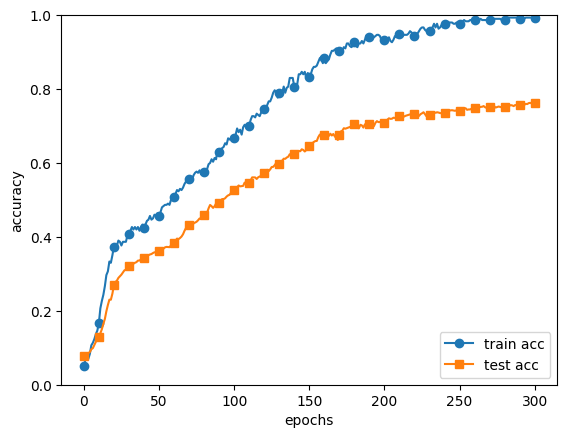

Dropout ratio: 0.120


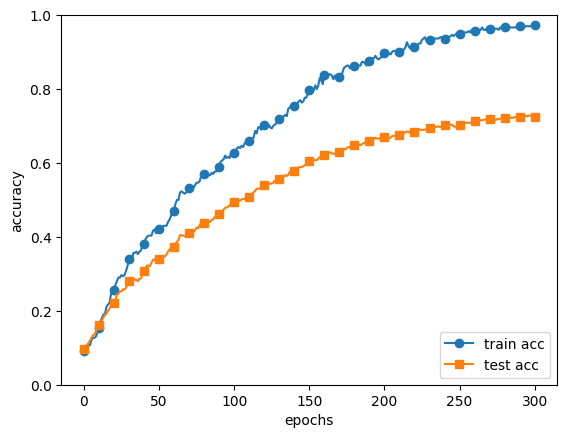

Dropout ratio: 0.130


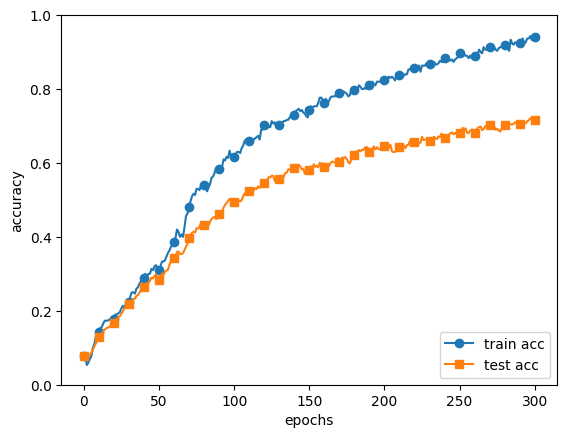

Dropout ratio: 0.140


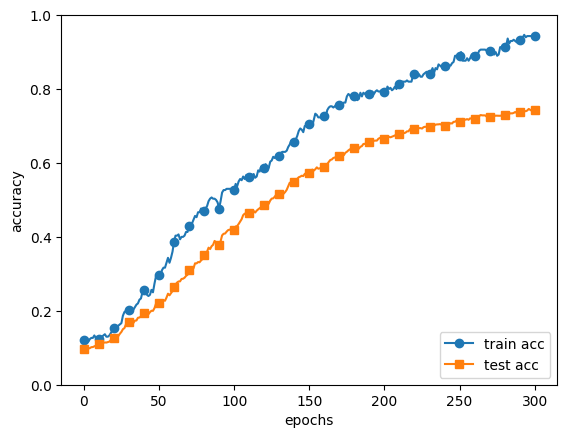

Dropout ratio: 0.150


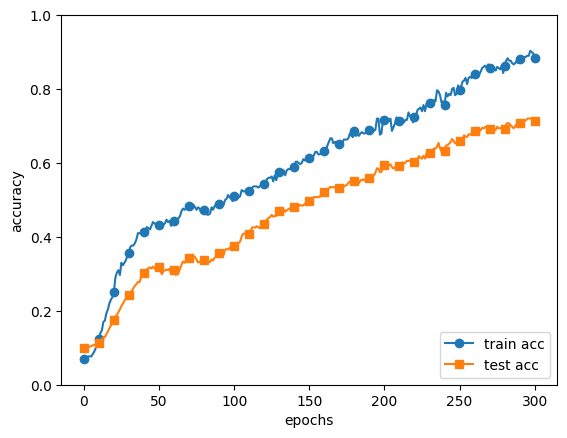

Dropout ratio: 0.160


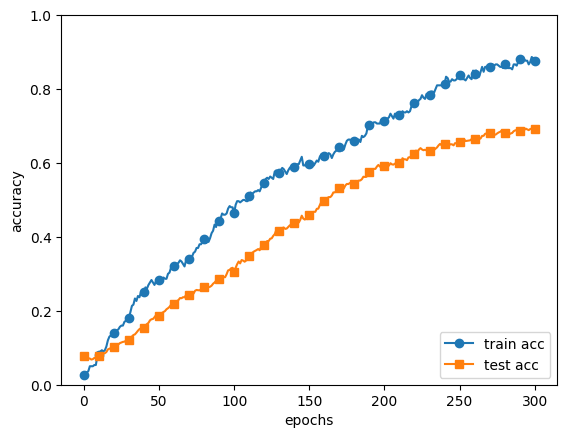

Dropout ratio: 0.170


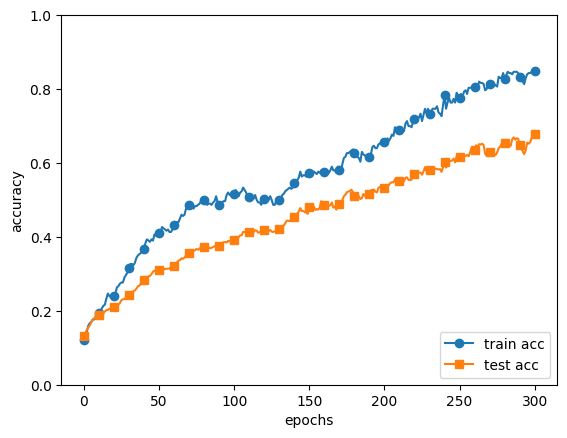

Dropout ratio: 0.180


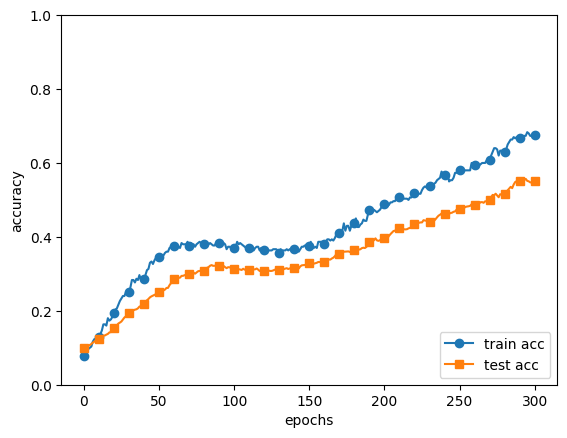

Dropout ratio: 0.190


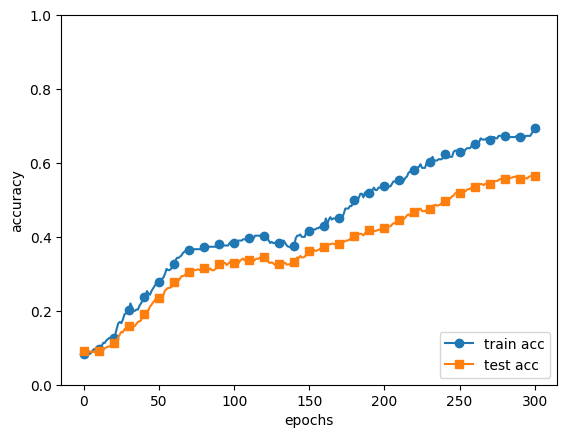

Dropout ratio: 0.200


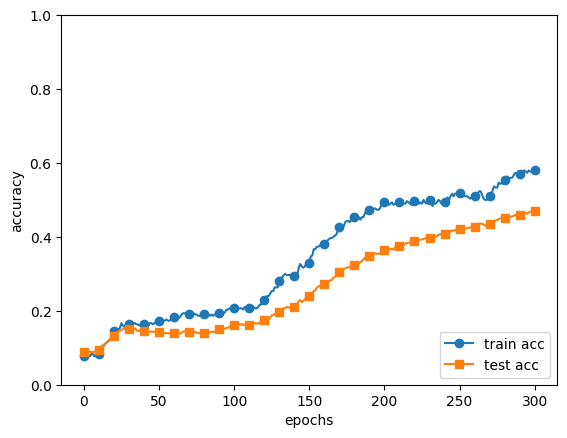

Dropout ratio: 0.210


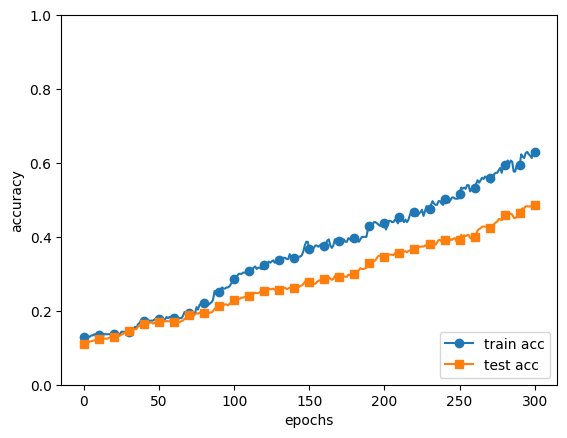

Dropout ratio: 0.220


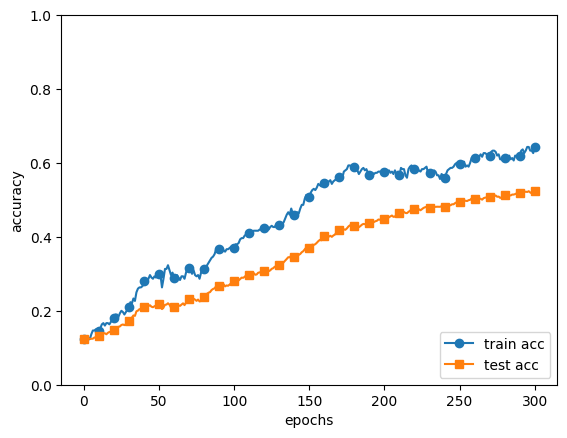

Dropout ratio: 0.230


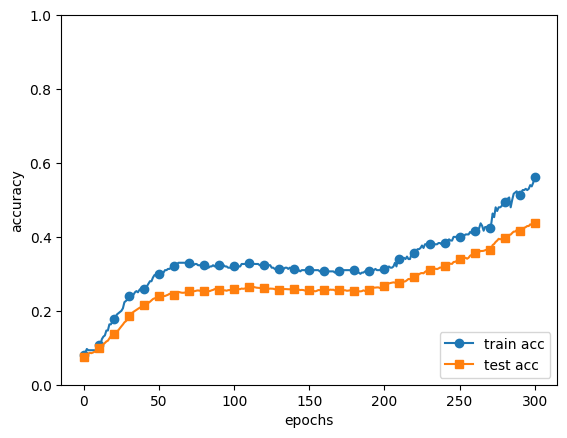

Dropout ratio: 0.240


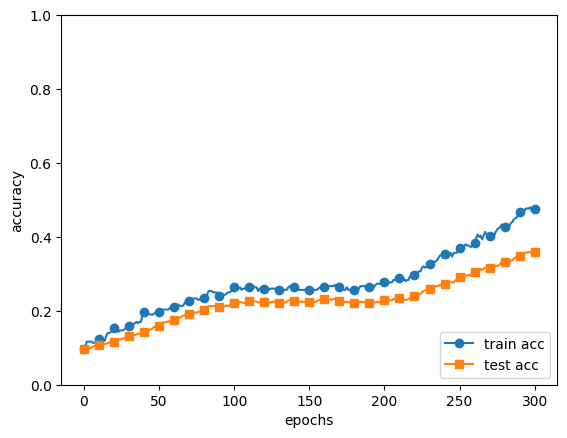

Dropout ratio: 0.250


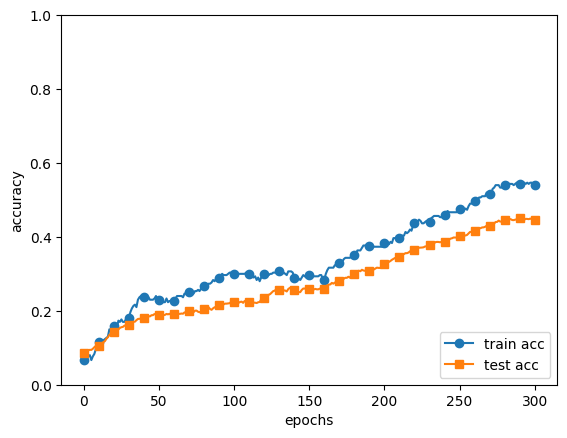

Dropout ratio: 0.260


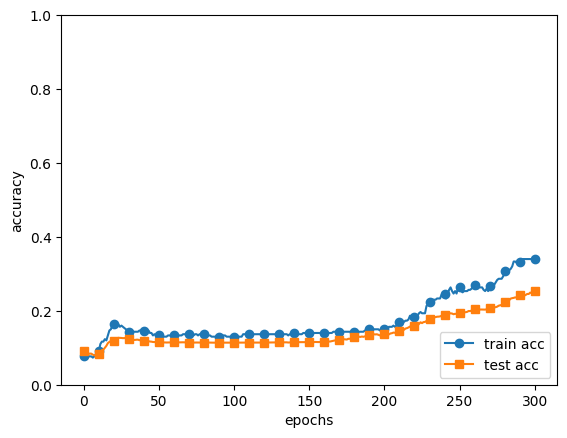

Dropout ratio: 0.270


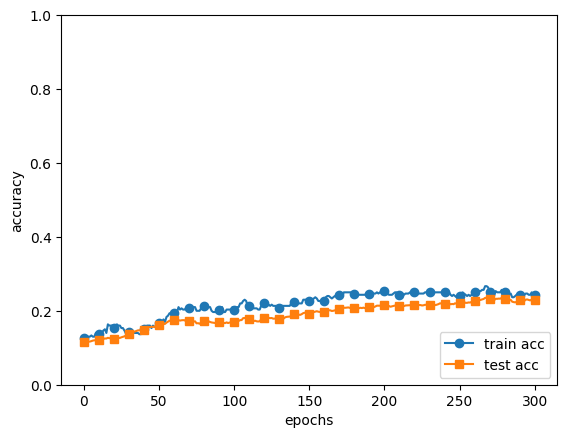

Dropout ratio: 0.280


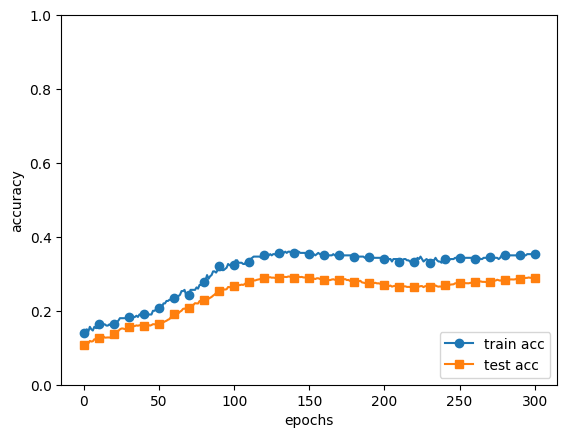

Dropout ratio: 0.290


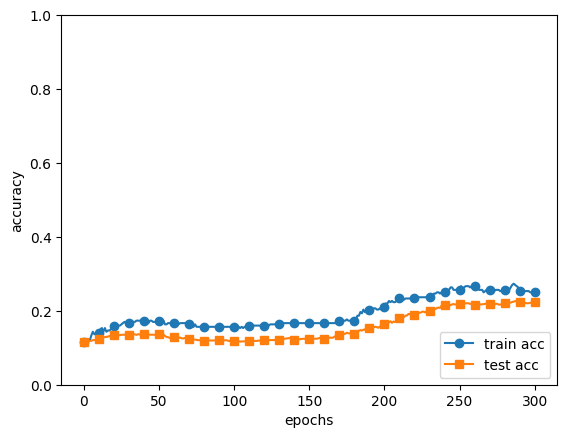

Dropout ratio: 0.300


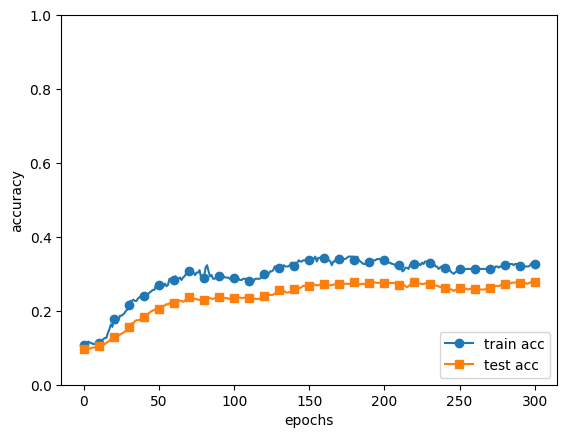

Dropout ratio: 0.310


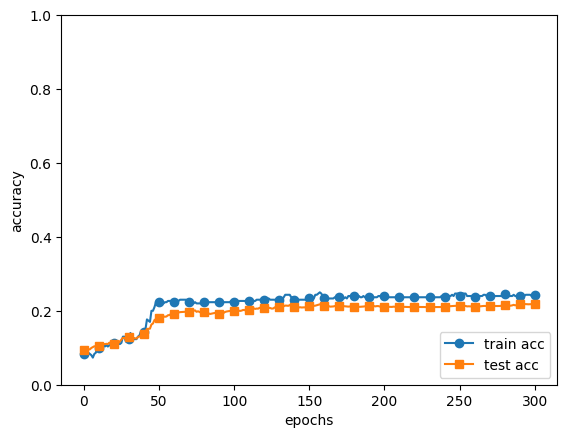

Dropout ratio: 0.320


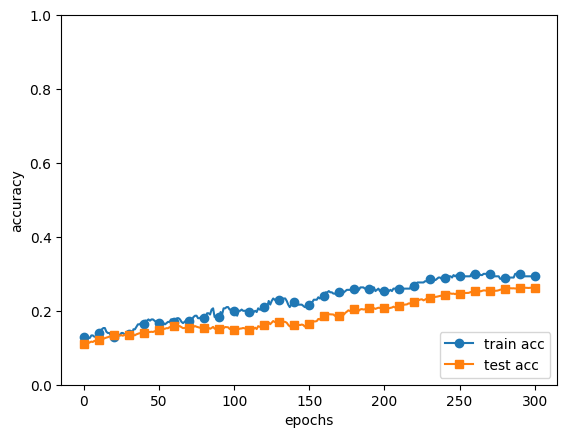

Dropout ratio: 0.330


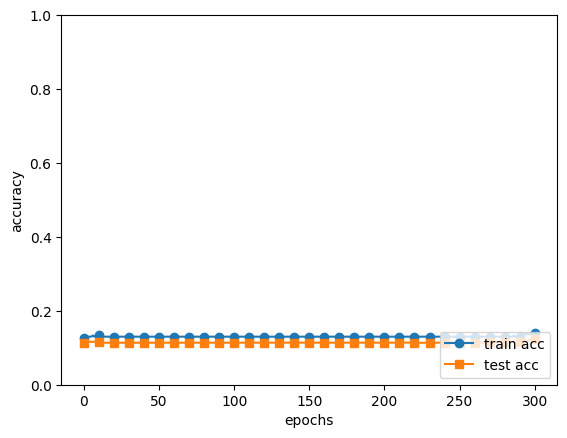

Dropout ratio: 0.340


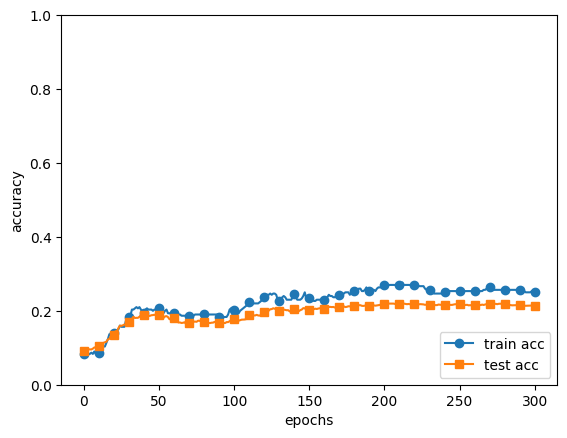

In [19]:
import os, sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# implement overfitting by reducing the training data size
x_train = x_train[:300]
t_train = t_train[:300]

# Define dropout ratios to test (0.1 to 0.3 with step 0.05)
for ratio in np.arange(0.1, 0.35, 0.01):
    print(f"Dropout ratio: {ratio:.3f}")
    use_dropout = True
    dropout_ratio = ratio

    network = MultiLayerNetExtend(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100, 100, 100],
        output_size=10,
        use_dropout=use_dropout,
        dropout_ration=dropout_ratio,
    )
    trainer = Trainer(
        network,
        x_train,
        t_train,
        x_test,
        t_test,
        epochs=301,
        mini_batch_size=100,
        optimizer="sgd",
        optimizer_param={"lr": 0.01},
        verbose=False,
    )
    trainer.train()

    train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

    markers = {"train": "o", "test": "s"}
    x = np.arange(len(train_acc_list))

    plt.plot(x, train_acc_list, label="train acc", marker="o", markevery=10)
    plt.plot(x, test_acc_list, label="test acc", marker="s", markevery=10)
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc="lower right")
    plt.show()